### Softmax by KARAS

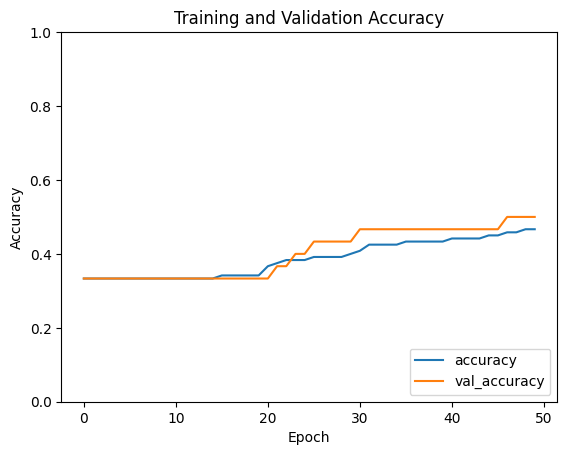

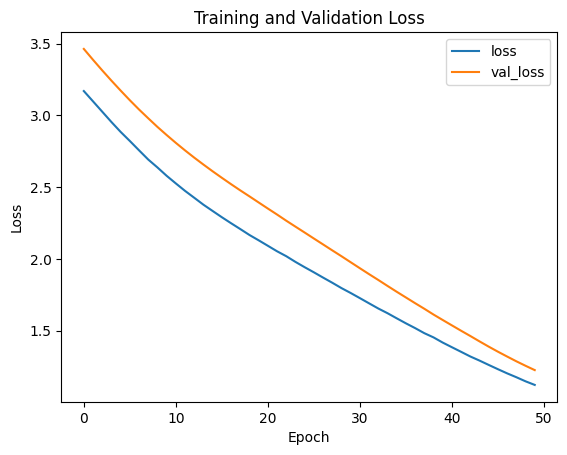

1/1 [==============================] - 0s 34ms/step - loss: 1.2255 - accuracy: 0.5000
Test accuracy: 0.5
1/1 [==============================] - 0s 48ms/step
Predicted classes: [1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0]


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 모델 구축
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=(4,), activation='softmax') # 입력 차원은 4, 클래스는 3
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# 훈련 과정 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# 예측
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# 예측 결과 출력
print("Predicted classes:", predicted_classes)


### softmax by sklearn

Test accuracy: 1.0


c:\Users\LG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


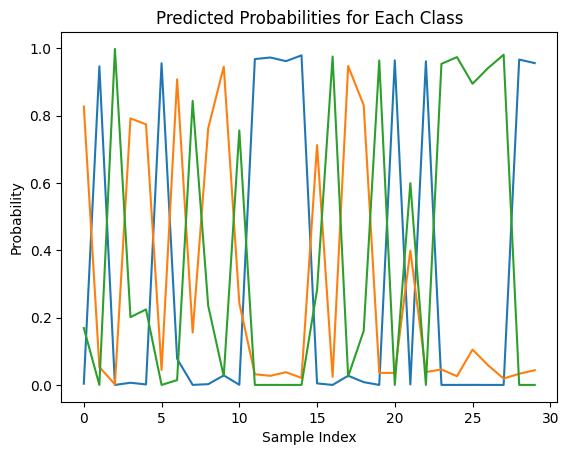

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 준비
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 모델 구축
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# 모델 훈련
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

# 시각화 (학습 과정에서의 정확도)
plt.plot(model.predict_proba(X_test))
plt.xlabel('Sample Index')
plt.ylabel('Probability')
plt.title('Predicted Probabilities for Each Class')
plt.show()
